In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# find NULL Data
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset
df_train_o = pd.read_csv('./train.csv')
df_test_o = pd.read_csv('./test.csv')

In [3]:
df_train_o.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
int_data = []
for i in df_train_o.columns:
    if type(df_train_o[i][0]) == type(df_train_o['SalePrice'][0]):
        int_data.append(i)
        
heatmap_data = df_train_o[int_data]

In [6]:
heatmap_d1 = heatmap_data.iloc[:, :len(int_data)//2]
heatmap_d1['SalePrice'] = df_train_o['SalePrice']
heatmap_d2 = heatmap_data.iloc[:, len(int_data)//2:]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

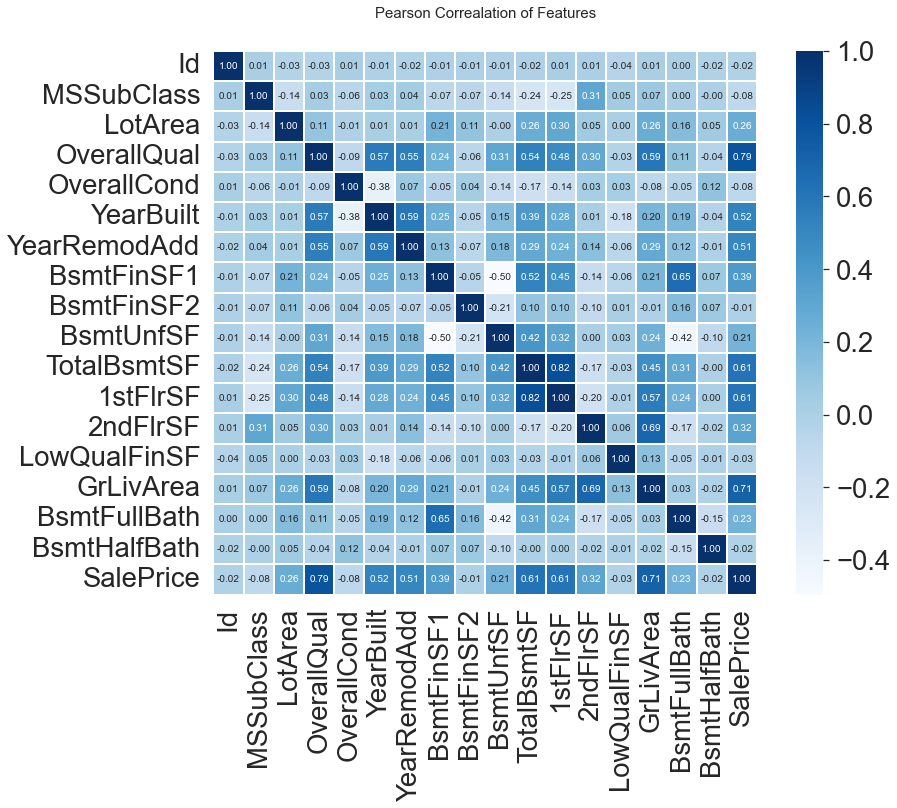

In [7]:
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_d1.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10}, fmt='.2f')

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

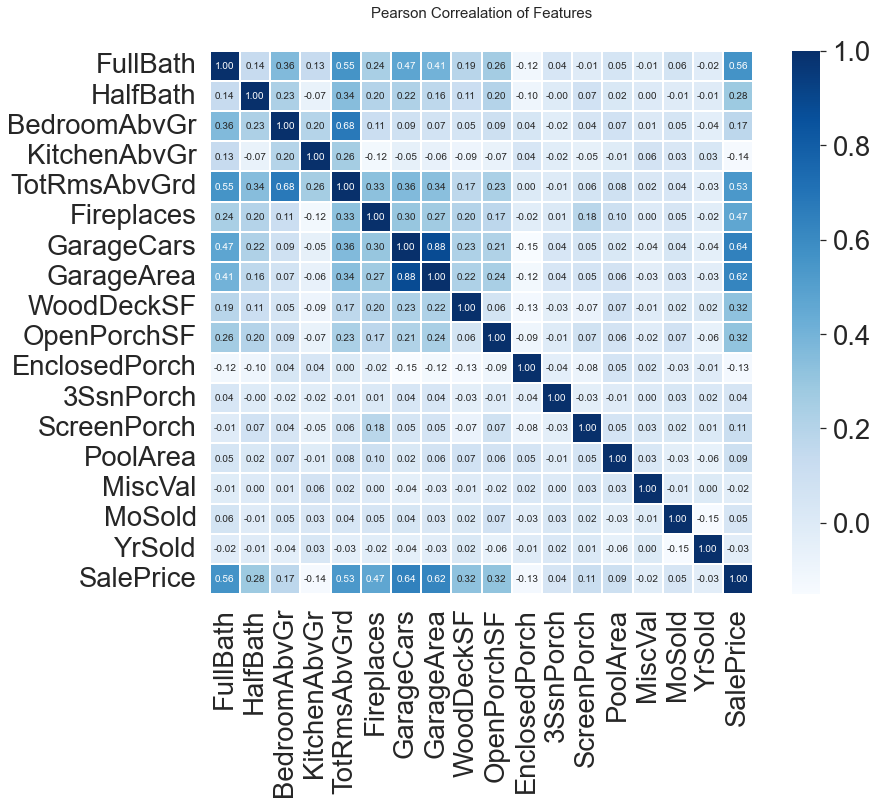

In [8]:
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_d2.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10}, fmt='.2f')

In [9]:
df_train.corr()

NameError: name 'df_train' is not defined

In [10]:
train_columns = []
for i in df_train_o.columns:
    if df_train_o['SalePrice'].corr(df_train_o[i], method='kendall') >= 0.3:
        train_columns.append(i)
test_columns = train_columns[:len(train_columns)-1]

In [11]:
df_train = df_train_o[train_columns]
df_test = df_test_o[test_columns]

In [12]:
df_train.head()

,LotArea,Alley,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,8450,NaN,7,2003,2003,196.0,PConc,856,856,1710,2,8,0,2003.0,2,548,61,208500
1,9600,NaN,6,1976,1976,0.0,CBlock,1262,1262,1262,2,6,1,1976.0,2,460,0,181500
2,11250,NaN,7,2001,2002,162.0,PConc,920,920,1786,2,6,1,2001.0,2,608,42,223500
3,9550,NaN,7,1915,1970,0.0,BrkTil,756,961,1717,1,7,1,1998.0,3,642,35,140000
4,14260,NaN,8,2000,2000,350.0,PConc,1145,1145,2198,2,9,1,2000.0,3,836,84,250000


In [13]:
df_test.head()

,LotArea,Alley,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF
0,11622,NaN,5,1961,1961,0.0,CBlock,882.0,896,896,1,5,0,1961.0,1.0,730.0,0
1,14267,NaN,6,1958,1958,108.0,CBlock,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,36
2,13830,NaN,5,1997,1998,0.0,PConc,928.0,928,1629,2,6,1,1997.0,2.0,482.0,34
3,9978,NaN,6,1998,1998,20.0,PConc,926.0,926,1604,2,7,1,1998.0,2.0,470.0,36
4,5005,NaN,8,1992,1992,0.0,PConc,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0,82


In [14]:
df_train.isnull().sum()

LotArea            0
Alley           1369
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
Foundation         0
TotalBsmtSF        0
1stFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
OpenPorchSF        0
SalePrice          0
dtype: int64

In [15]:
df_test.isnull().sum()

LotArea            0
Alley           1352
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
Foundation         0
TotalBsmtSF        1
1stFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
OpenPorchSF        0
dtype: int64

In [16]:
df_train.drop(['Alley'], axis=1, inplace=True)
df_test.drop(['Alley'], axis=1, inplace=True)

In [17]:
df_train['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [18]:
df_train_o.corrwith(df_train_o['GarageYrBlt'], method='spearman')

Id              -0.000194
MSSubClass       0.079268
LotFrontage      0.115694
LotArea          0.041796
OverallQual      0.618193
OverallCond     -0.379398
YearBuilt        0.890546
YearRemodAdd     0.722377
MasVnrArea       0.305964
BsmtFinSF1       0.078935
BsmtFinSF2      -0.153579
BsmtUnfSF        0.192027
TotalBsmtSF      0.338224
1stFlrSF         0.230299
2ndFlrSF         0.073097
LowQualFinSF    -0.028370
GrLivArea        0.281306
BsmtFullBath     0.095104
BsmtHalfBath    -0.096252
FullBath         0.538796
HalfBath         0.187364
BedroomAbvGr    -0.055864
KitchenAbvGr    -0.112130
TotRmsAbvGrd     0.198481
Fireplaces       0.084699
GarageYrBlt      1.000000
GarageCars       0.630966
GarageArea       0.591889
WoodDeckSF       0.274373
OpenPorchSF      0.394185
EnclosedPorch   -0.317438
3SsnPorch        0.016935
ScreenPorch     -0.099749
PoolArea        -0.007330
MiscVal         -0.067091
MoSold           0.012337
YrSold          -0.005770
SalePrice        0.593788
dtype: float

In [19]:
df_train['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [20]:
df_train['GarageYrBlt'].fillna(df_train['YearBuilt'], inplace=True)
df_test['GarageYrBlt'].fillna(df_test['YearBuilt'], inplace=True)

In [21]:
df_train.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Foundation      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
SalePrice       0
dtype: int64

In [23]:
df_train['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [24]:
df_train['MasVnrArea'].fillna(0.0, inplace=True)
df_test['MasVnrArea'].fillna(0.0, inplace=True)

In [25]:
df_train.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Foundation      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
SalePrice       0
dtype: int64

In [26]:
df_test.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Foundation      0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      1
GarageArea      1
OpenPorchSF     0
dtype: int64

In [ ]:
df_test['TotalBsmtSF'].fillna(round(df_test['TotalBsmtSF'].sum()//len(df_test), 1), inplace=True)

In [27]:
df_test['TotalBsmtSF']

0        882.0
1       1329.0
2        928.0
3        926.0
4       1280.0
         ...  
1454     546.0
1455     546.0
1456    1224.0
1457     912.0
1458     996.0
Name: TotalBsmtSF, Length: 1459, dtype: float64